In [39]:
import pandas as pd

In [40]:
from sklearn.datasets import fetch_california_housing

In [41]:
import numpy as np

In [42]:
import matplotlib.pyplot as plt

In [43]:
data_frame = fetch_california_housing() # to arrange the data we bring it into pandas dataframe 

In [44]:
dataset = pd.DataFrame(data_frame.data) # extract the training data and store it as another dataframe 

In [45]:
dataset.columns = data_frame.feature_names  # convert dataset data into row col form 

In [66]:
dataset.head() # visualize initial blocks of the data 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [70]:
data_frame # visualize the data frame or total data , note that this is in dict form only 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [47]:
## Independent & Dependent features 

X = dataset # independent 
Y = data_frame.target # dependent

In [48]:
# train and test data split 

from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [49]:
# standardizing the input data : this is diferent than normalizing the input
# standardization makes the data to center about 0 or origin.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)

In [51]:
X_test = scaler.transform(X_test) # note that we need not standardize the output set. 

In [52]:
# this operation is used to inverse the efect of transformation 
# scaler.inverse_transform(X_train) 

In [53]:
X_train 

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [54]:
from sklearn.linear_model import LinearRegression

# cross validation : this will make multiple models using multiple datasets parts then check error of each with respect to correct.

from sklearn.model_selection import cross_val_score

In [55]:
regression = LinearRegression()

regression.fit(X_train, Y_train)

LinearRegression()

In [56]:
mse = cross_val_score(regression, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [57]:
np.mean(mse) # this is the mean squared error : difference of predictoed and actual value 

-0.5257104326777

In [59]:
# now we will do the prediction from the test dataset 


reg_predict = regression.predict(X_test)

In [60]:
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

C:\Users\HP-PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


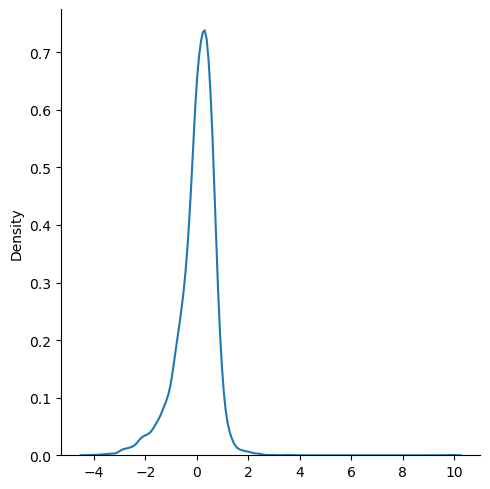

In [64]:
import seaborn as sns 

sns.displot(reg_predict - Y_test, kind = 'kde') 

# Conclusion : this clearly shows that our trained model most of the points only have error of -2 to 2 so a gud one !!

C:\Users\HP-PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


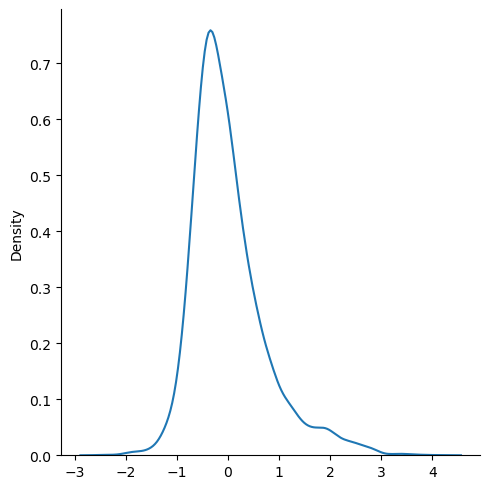

In [5]:
### PRACTICE  10-6-24:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing





dataframe = fetch_california_housing()

dataset = pd.DataFrame(dataframe.data)
dataset.columns = dataframe.feature_names



X = dataset
Y = dataframe.target


X_train , X_test, Y_train , Y_test  = train_test_split(X, Y, test_size = 0.30, random_state = 35)


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



regression = LinearRegression()


regression.fit(X_train, Y_train)



mse = cross_val_score(regression, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = 15 )


predict = regression.predict(X_test)


sns.displot(Y_test - predict, kind = 'kde') 
